In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from numpy import*

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
path = '2008.csv.bz2'
df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0



# 1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?(Which of the listed below is not in your top-10 list?) *
DL
AA
OO
EV

In [126]:
df.UniqueCarrier.value_counts().head(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

# 2. What is the most frequent reason for flight cancellation? *
carrier
weather conditions
National Air System
security reasons

In [7]:
df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

A	Carrier
B	Weather
C	National Air System
D	Security

# 3. Which route is the most frequent, in terms of the number of flights? *

In [9]:
(df['Origin']+df['Dest']).value_counts().head(1)

SFOLAX    13788
dtype: int64

# 4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay. *

In [7]:
df['route']=df.Origin+df.Dest

In [8]:
df.route.value_counts().head()

SFOLAX    13788
LAXSFO    13390
OGGHNL    12383
LGABOS    12035
BOSLGA    12029
Name: route, dtype: int64

In [76]:
df.groupby(['route'])['CarrierDelay'].sum().sort_values(ascending=False).head()

route
JFKLAX    46912.0
ORDLAX    43904.0
DFWLAX    43360.0
LAXHNL    42176.0
MIASJU    40992.0
Name: CarrierDelay, dtype: float16

In [11]:
feat=['JFKLAX','ORDLAX','DFWLAX','LAXHNL','MIASJU']

In [69]:
df[(df['route'].isin(feat)) \
   & (df['WeatherDelay'] > 0 ) \
   & (df['WeatherDelay'] >= df['NASDelay']) \
   & (df['WeatherDelay'] >= df['SecurityDelay']) \
   & (df['WeatherDelay'] >= df['LateAircraftDelay']) \
   & (df['WeatherDelay'] >= df['CarrierDelay'])].count()

Year                 330
Month                330
DayofMonth           330
DayOfWeek            330
DepTime              330
UniqueCarrier        330
FlightNum            330
ArrDelay             330
DepDelay             330
Origin               330
Dest                 330
Distance             330
Cancelled            330
CancellationCode       0
CarrierDelay         330
WeatherDelay         330
NASDelay             330
SecurityDelay        330
LateAircraftDelay    330
route                330
dtype: int64

In [ ]:
# 330, 324, 689 

# 5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,route
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,IADTPA
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,IADTPA
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,INDBWI
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,INDBWI
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,INDBWI


In [81]:
df[(df['DepTime'] >= 000.0) & (df['DepTime'] <= 400.0)].count() ,\
df[(df['DepTime'] == 1900.0)].count()

(Year                 28416
 Month                28416
 DayofMonth           28416
 DayOfWeek            28416
 DepTime              28416
 UniqueCarrier        28416
 FlightNum            28416
 ArrDelay             28284
 DepDelay             28416
 Origin               28416
 Dest                 28416
 Distance             28416
 Cancelled            28416
 CancellationCode        12
 CarrierDelay         15502
 WeatherDelay         15502
 NASDelay             15502
 SecurityDelay        15502
 LateAircraftDelay    15502
 route                28416
 dtype: int64, Year                 9233
 Month                9233
 DayofMonth           9233
 DayOfWeek            9233
 DepTime              9233
 UniqueCarrier        9233
 FlightNum            9233
 ArrDelay             9223
 DepDelay             9233
 Origin               9233
 Dest                 9233
 Distance             9233
 Cancelled            9233
 CancellationCode        1
 CarrierDelay         2662
 WeatherDelay        

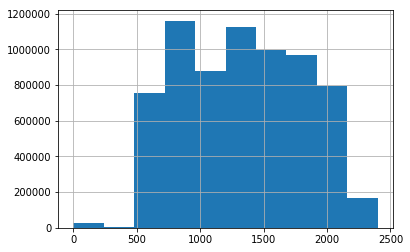

In [82]:
df['DepTime'].hist()

# 6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings. Choose all correct statements *


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04842330>]],
      dtype=object)

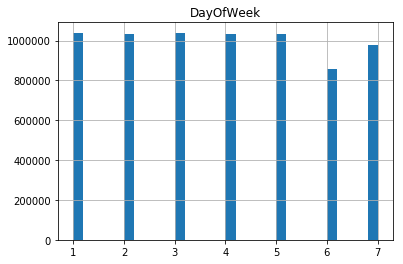

In [8]:
df.hist('DayOfWeek', bins=30)

In [15]:
df[df['Month'].isin([6,7,8])].count()

Year                 1848875
Month                1848875
DayofMonth           1848875
DayOfWeek            1848875
DepTime              1817511
UniqueCarrier        1848875
FlightNum            1848875
ArrDelay             1811631
DepDelay             1817511
Origin               1848875
Dest                 1848875
Distance             1848875
Cancelled            1848875
CancellationCode       31364
CarrierDelay          424791
WeatherDelay          424791
NASDelay              424791
SecurityDelay         424791
LateAircraftDelay     424791
dtype: int64

In [13]:
df[df['Month'].isin([1,2,12])].count()

Year                 1719959
Month                1719959
DayofMonth           1719959
DayOfWeek            1719959
DepTime              1665023
UniqueCarrier        1719959
FlightNum            1719959
ArrDelay             1658802
DepDelay             1665023
Origin               1719959
Dest                 1719959
Distance             1719959
Cancelled            1719959
CancellationCode       55683
CarrierDelay          473691
WeatherDelay          473691
NASDelay              473691
SecurityDelay         473691
LateAircraftDelay     473691
dtype: int64

# 7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months. Choose all correct statements: *

In [16]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


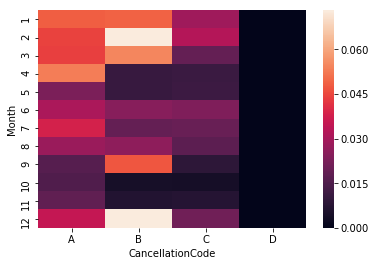

In [25]:
sns.heatmap(pd.crosstab(df.Month, df.CancellationCode, normalize=True));

In [29]:
pd.crosstab(df.Month, df.CancellationCode, normalize=False)

CancellationCode,A,B,C,D
Month,,,,
1,6635,6711,3962,0
2,6090,10034,4470,2
3,6038,7520,2621,4
4,7312,1479,1564,0
5,3157,1461,1608,3
6,4251,3448,3232,0
7,5292,2612,2694,0
8,3852,3582,2401,0
9,2246,6478,1188,1


# 8. Which month has the greatest number of cancellations due to Carrier? *

In [30]:
pd.crosstab(df.Month, df.CancellationCode, normalize=False)

CancellationCode,A,B,C,D
Month,,,,
1,6635,6711,3962,0
2,6090,10034,4470,2
3,6038,7520,2621,4
4,7312,1479,1564,0
5,3157,1461,1608,3
6,4251,3448,3232,0
7,5292,2612,2694,0
8,3852,3582,2401,0
9,2246,6478,1188,1


# 9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question. *

In [17]:
df[(df['Month']==4) & (df['CancellationCode']=='A')]['UniqueCarrier'].value_counts().head(1)

AA    3696
Name: UniqueCarrier, dtype: int64

# 10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? *

In [19]:
df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [45]:
df.pivot_table(values=['ArrDelay','DepDelay'],index='UniqueCarrier', aggfunc=['median'])

median         
              ArrDelay DepDelay
UniqueCarrier                  
9E                -5.0     -3.0
AA                 1.0     -1.0
AQ                -4.0     -4.0
AS                -3.0     -2.0
B6                -3.0     -2.0
CO                 0.0      1.0
DL                -1.0     -1.0
EV                -2.0     -1.0
F9                 0.0     -1.0
FL                -1.0     -2.0
HA                -3.0     -4.0
MQ                -2.0     -2.0
NW                -1.0     -3.0
OH                 1.0      0.0
OO                -3.0     -3.0
UA                -1.0     -1.0
US                -5.0     -2.0
WN                -3.0      1.0
XE                -2.0     -2.0
YV                 0.0     -1.0